In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import time

In [ ]:
url = 'https://search.shopping.naver.com/api/review'

In [ ]:
query = {
    'nvMid': '29938164618',
    'page': 2,
    'pageSize': 20,
    'sortType': 'QUALITY',
    'isNeedAggregation': 'N'
}

In [ ]:
headers = {
    'referer': 'https://search.shopping.naver.com',
    'user-agent': 'Mozilla/5.0'
}

In [ ]:
res = requests.get(url = url, params = query, headers = headers)

In [ ]:
res.status_code

In [ ]:
res.headers['content-type']

In [ ]:
res.text

In [ ]:
dat = json.loads(s = res.text)
dat

In [ ]:
df = pd.DataFrame(data = dat['reviews'])

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.iloc[0]

In [ ]:
df.columns

In [ ]:
cols = ['modifyDate', 'mallReviewId', 'starScore', 'title', 'content', 'mallName']

In [ ]:
df = df[cols]

In [ ]:
df

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import time

def naverShoppingReview(prod, page = 1):
    url = 'https://search.shopping.naver.com/api/review'
    query = {
        'nvMid': prod,
        'page': page,
        'pageSize': 20,
        'sortType': 'QUALITY',
        'isNeedAggregation': 'N'
    }
    headers = {
        'referer': 'https://search.shopping.naver.com',
        'user-agent': 'Mozilla/5.0'
    }
    res = requests.get(url = url, params = query, headers = headers)
    dat = json.loads(s = res.text)
    df = pd.DataFrame(data = dat['reviews'])
    cols = ['modifyDate', 'mallReviewId', 'starScore', 'title', 'content', 'mallName']
    
    return df[cols]

In [ ]:
df = naverShoppingReview(prod = '29938164618')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
dfAll = pd.DataFrame()

In [ ]:
for i in tqdm(range(50)):
    df = naverShoppingReview(prod = '29938164618', page = i + 1)
    dfAll = pd.concat(objs = [dfAll, df], ignore_index = True)
    time.sleep(3)

In [ ]:
dfAll.shape[0]

In [ ]:
dfAll.info()

In [ ]:
dfAll.head()

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
prod = '29938164618'

In [ ]:
dfAll.to_excel(f'Naver_Shopping_{prod}.xlsx', index = False)

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.getcwd()

'C:\\Users\\hdsce\\Documents\\PythonDataAnalysis1\\live'

In [3]:
os.chdir('../data')

In [4]:
os.listdir()

['APT_Detail_Seoul_2022.csv',
 'APT_Detail_Seoul_2022.xlsx',
 'APT_Merged_Seoul_2022.txt',
 'APT_Merged_Seoul_2022.xlsx',
 'APT_Merged_Seoul_2022.z',
 'APT_Price_Seoul_2020_2022.csv',
 'APT_Price_Seoul_2020_2022.xlsx',
 'APT_Price_Seoul_2020_2022.z',
 'Frequency.xlsx',
 'Naver_Shopping_29938164618.xlsx',
 'NA_Sample.xlsx',
 'online_mall.csv',
 'Online_Mall.z',
 'Online_Mall_Merged.xlsx',
 'Online_Mall_Raw.xlsx']

In [5]:
df = pd.read_excel('Naver_Shopping_29938164618.xlsx')

In [6]:
df['modifyDate'] = df['modifyDate'].astype('datetime64[ns]')

C:\Users\hdsce\AppData\Local\Temp\ipykernel_9260\2389678987.py:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df['modifyDate'] = df['modifyDate'].astype(np.datetime64)


In [7]:
df['mallName'].value_counts()

LG전자인증점 신영플러스    351
LG전자             255
하이마트쇼핑몰           96
퍼스트마키             35
G마켓               33
SK스토아             28
SN코리아유통           25
롯데홈쇼핑             25
노써치               20
SSG닷컴             19
11번가              17
GSSHOP            15
신세계몰              11
쇼핑의전당             11
인터파크쇼핑             7
옥션                 7
롯데백화점              6
CJ온스타일             4
더 드림 마켓            4
머스트잇               4
위메프                3
치코마켓               3
현대Hmall            3
신세계라이브쇼핑           2
롯데ON               2
한샘몰                2
우아한 컴퍼니            2
동행슈퍼               2
MJ테크               2
E-랜드몰              1
아이비젼               1
홈앤쇼핑               1
타조83               1
달인전자               1
Name: mallName, dtype: int64

In [8]:
df.groupby(by = ['mallName'])['starScore'].mean()

mallName
11번가             4.764706
CJ온스타일           5.000000
E-랜드몰            1.000000
GSSHOP           4.800000
G마켓              4.757576
LG전자             4.658824
LG전자인증점 신영플러스    4.911681
MJ테크             5.000000
SK스토아            4.964286
SN코리아유통          5.000000
SSG닷컴            5.000000
노써치              4.950000
달인전자             5.000000
더 드림 마켓          4.750000
동행슈퍼             5.000000
롯데ON             5.000000
롯데백화점            4.666667
롯데홈쇼핑            4.960000
머스트잇             5.000000
쇼핑의전당            4.909091
신세계라이브쇼핑         5.000000
신세계몰             5.000000
아이비젼             5.000000
옥션               4.857143
우아한 컴퍼니          5.000000
위메프              5.000000
인터파크쇼핑           4.714286
치코마켓             5.000000
타조83             5.000000
퍼스트마키            4.971429
하이마트쇼핑몰          4.906250
한샘몰              5.000000
현대Hmall          5.000000
홈앤쇼핑             5.000000
Name: starScore, dtype: float64

In [9]:
df['modifyDate'] = df['modifyDate'].astype('datetime64[ns]')

In [10]:
df['month'] = df['modifyDate'].dt.strftime('%m월')

In [11]:
df.head()

,modifyDate,mallReviewId,starScore,title,content,mallName,month
0,2022-07-27,5810,5,<br>나만의 공간에서 나만을 위한 시간을,<br>나만의 공간에서 나만을 위한 시간을 함께하는 신개념 무선 프라이빗 스크린 L...,LG전자,07월
1,2021-12-10,001570390036,5,사용한 지 한 달째인데요. 웨이브,사용한 지 한 달째인데요. 웨이브 등의 콘텐츠 무료 혜택이 아무 통지 없이 딱 한 ...,하이마트쇼핑몰,12월
2,2022-09-12,4081929271,5,오.타.쿠.에게 최적화된 상품입니다 ..진짜 진짜 너무 편하고 &hellip; 출시...,오.타.쿠.에게 최적화된 상품입니다 ..<br>진짜 진짜 너무 편하고 &hellip...,LG전자인증점 신영플러스,09월
3,2022-07-27,7667,5,안방인테리어의 완성은 LG스탠바이미❤,안방인테리어의 완성은 LG스탠바이미❤️<br><em>디자인 진짜 너무 예쁘고요</e...,LG전자,07월
4,2022-08-10,8315,5,스탠바이미 출시 때 부터 너무 갖고싶,스탠바이미 출시 때 부터 너무 갖고싶었는데 드디어 만났어요! ㅠㅠ 감격입니다. 공...,LG전자,08월


In [12]:
df['month'].value_counts()

12월    157
01월    124
07월     94
10월     63
11월     49
02월     29
08월     26
03월     18
09월     14
06월     13
04월      9
05월      6
Name: month, dtype: int64

In [13]:
df['title']

0                                <br>나만의 공간에서 나만을 위한 시간을
1                                    사용한 지 한 달째인데요. 웨이브 
2      오.타.쿠.에게 최적화된 상품입니다 ..진짜 진짜 너무 편하고 &hellip; 출시...
3                                   안방인테리어의 완성은 LG스탠바이미❤
4                                   스탠바이미 출시 때 부터 너무 갖고싶
                             ...                        
995                                    감사합니당 다음에 또 구매할께욘
996                                    질질끌고다니면서 보기 편해요 ㅋ
997                                  한달을써도 너무 좋다.. 큰화면 짱
998                                    침대에 누워서 보기에 최고입니다
999                                    와입이 너무 좋아합니다 감사해여
Name: title, Length: 1000, dtype: object

In [23]:
df['title'] = df['title'].str.replace(pat = '[^가-힣]', repl = '', regex = True)

In [38]:
df['content'] = df['content'].str.replace(pat = '[^가-힣]', repl = '', regex = True)

In [39]:
df.head()

,modifyDate,mallReviewId,starScore,title,content,mallName,month
0,2022-07-27,5810,5,나만의공간에서나만을위한시간을,나만의공간에서나만을위한시간을함께하는신개념무선프라이빗스크린스탠바이미드디어도착첫느낌너무...,LG전자,07월
1,2021-12-10,001570390036,5,사용한지한달째인데요웨이브,사용한지한달째인데요웨이브등의콘텐츠무료혜택이아무통지없이딱한달되자마자모조리사라지고유료회...,하이마트쇼핑몰,12월
2,2022-09-12,4081929271,5,오타쿠에게최적화된상품입니다진짜진짜너무편하고출시된지꽤됐어도산거후회안해요여전히곧세대해상...,오타쿠에게최적화된상품입니다진짜진짜너무편하고출시된지꽤됐어도산거후회안해요여전히곧세대해상...,LG전자인증점 신영플러스,09월
3,2022-07-27,7667,5,안방인테리어의완성은스탠바이미,안방인테리어의완성은스탠바이미디자인진짜너무예쁘고요앞모습이쁜건알고있었는데어쩜뒷모습까지깔...,LG전자,07월
4,2022-08-10,8315,5,스탠바이미출시때부터너무갖고싶,스탠바이미출시때부터너무갖고싶었는데드디어만났어요감격입니다공홈에서구매해서그런지배송도지정...,LG전자,08월


In [25]:
from kiwipiepy import Kiwi

In [26]:
kiwi = Kiwi()

In [40]:
sen = df['content'].iloc[0]
sen

'나만의공간에서나만을위한시간을함께하는신개념무선프라이빗스크린스탠바이미드디어도착첫느낌너무깔끔하고무빙스탠드디자인을적용하여집안어디서든이동하여시청할수있어서좋았어요할로윈데이나크리스마스시즌에는업데이트를통해이벤트스킨을제공하고시스템앱에러업데이트가신속하게제공됩니다제품하단에무빙휠이적용돼침실부엌서재등원하는곳으로옮겨가며편리하게이용할수있어너무맘에들어요내장배터리를탑재해전원연결없이도최장시간동안사용가능해서공간제약을받지않아요인체공학디자인이라화면좌우를앞뒤로각각도까지조정할수있는스위블위아래로각각도까지기울일수있는틸트시계및반시계방향각각도회전하는로테이팅을모두지원해서편리합니다높이도최대내에서조정가능해서시청자세에맞춰화면위치를자유롭게조절할수있어침대에누워서도불편함이없어요년형와동일한운영체제인을탑재해서무료채널제공서비스인채널한국기준총개무료채널제공최신에서이용가능한다양한콘텐츠인공지능홈보드로집안가전의작동상태를한눈에확인하고손쉽게제어할수도있어요리모컨뿐아니라손가락으로직접화면을터치해조작할수도있고간편한조작이가능한전용사용자인터페이스도탑재해서화면을쓸어넘기는스와이프방식제스쳐컨트롤도지원해서너무좋아요근거리무선통신기술로안드로이드운영체제기반최신스마트폰과간편하게연동하는셰어링탭기능과모니터뒷편스마트폰거치대그리고노트북과화면공유도가능해서침대에누워서영화음악도편하게이용가능합니다패브릭으로마감돼깔끔하면서도고급스러운디자인도맘에들고평상시그림시계사진등을띄워인테리어오브제로활용할수있어좋았어요아이폰미러링지원으로모든핸드폰를지원해서활용도가우수합니다새로운패러다임을이끌어가는웅원합니다'

In [41]:
tokens = kiwi.tokenize(text = sen, normalize_coda = True)

In [42]:
tokens

[Token(form='나', tag='NP', start=0, len=1),
 Token(form='만', tag='JX', start=1, len=1),
 Token(form='의', tag='JKG', start=2, len=1),
 Token(form='공간', tag='NNG', start=3, len=2),
 Token(form='에서', tag='JKB', start=5, len=2),
 Token(form='나', tag='NP', start=7, len=1),
 Token(form='만', tag='JX', start=8, len=1),
 Token(form='을', tag='JKO', start=9, len=1),
 Token(form='위하', tag='VV', start=10, len=2),
 Token(form='ᆫ', tag='ETM', start=11, len=1),
 Token(form='시간', tag='NNG', start=12, len=2),
 Token(form='을', tag='JKO', start=14, len=1),
 Token(form='함께', tag='MAG', start=15, len=2),
 Token(form='하', tag='VV', start=17, len=1),
 Token(form='는', tag='ETM', start=18, len=1),
 Token(form='신', tag='XPN', start=19, len=1),
 Token(form='개념', tag='NNG', start=20, len=2),
 Token(form='무선', tag='NNG', start=22, len=2),
 Token(form='프라이', tag='NNG', start=24, len=3),
 Token(form='빗', tag='NNG', start=27, len=1),
 Token(form='스크린', tag='NNG', start=28, len=3),
 Token(form='스탠바이', tag='NNG', start=

In [43]:
for token in tokens:
    if token.tag in ['NNG', 'NNP', 'VV', 'VA']:
        print(token.form)

공간
위하
시간
하
개념
무선
프라이
빗
스크린
스탠바이
미
도착
느낌
깔끔
스탠드
디자인
적용
집안
이동
시청
있
좋
할로윈
데이
크리스마스
시즌
업데이트
통하
이벤트
스킨
제공
시스템
앱
에러
업데이트
신속
제공
제품
하단
휠
적용
침실
부엌
서재
원하
곳
옮기
편리
이용
있
맘
들
내장
배터리
탑재
전원
연결
최장
시간
동안
사용
가능
공간
제약
인체
공학
디자인
화면
좌우
앞뒤
도
조정
있
스
위
위아래
도
기울이
있
티
트
시계
반시
방향
회전
로
테
팅
지원
편리
높이
최대
조정
가능
시청
자세
맞추
화면
위치
자유
조절
있
침대
불편
없
년
오
동일
운영
체제
인
탑재
무료
채널
제공
서비스
채널
국
기준
무료
채널
제공
최신
이용
가능
다양
콘텐츠
인공
지능
홈
보드
집안
가전
작동
상태
한눈
확인
제어
있
리모컨
손가락
화면
터치
조작
있
조작
가능
전용
사용자
인터페이스
탑재
화면
쓸
넘기
스와
이프
방식
제스쳐
컨트롤
지원
좋
근거리
무선
통신
기술
안드로이드
운영
체제
기반
최신
스마트폰
간편하
연동
셰어
링
탭
기능
모니터
뒷편
스마트폰
거치대
노트북
화면
공유
가능
침대
영화
음악
편하
이용
가능
패브릭
마감
고급
디자인
맘
들
평상시
그림
시계
사진
띄우
인테리어
오브제
활용
있
좋
아이폰
미러
링
지원
핸드폰
르
지원
활용도
우수
패러다임
이끌
웅
원


In [44]:
[token.form for token in tokens if token.tag in ['NNG', 'NNP', 'VV', 'VA']]

['공간',
 '위하',
 '시간',
 '하',
 '개념',
 '무선',
 '프라이',
 '빗',
 '스크린',
 '스탠바이',
 '미',
 '도착',
 '느낌',
 '깔끔',
 '스탠드',
 '디자인',
 '적용',
 '집안',
 '이동',
 '시청',
 '있',
 '좋',
 '할로윈',
 '데이',
 '크리스마스',
 '시즌',
 '업데이트',
 '통하',
 '이벤트',
 '스킨',
 '제공',
 '시스템',
 '앱',
 '에러',
 '업데이트',
 '신속',
 '제공',
 '제품',
 '하단',
 '휠',
 '적용',
 '침실',
 '부엌',
 '서재',
 '원하',
 '곳',
 '옮기',
 '편리',
 '이용',
 '있',
 '맘',
 '들',
 '내장',
 '배터리',
 '탑재',
 '전원',
 '연결',
 '최장',
 '시간',
 '동안',
 '사용',
 '가능',
 '공간',
 '제약',
 '인체',
 '공학',
 '디자인',
 '화면',
 '좌우',
 '앞뒤',
 '도',
 '조정',
 '있',
 '스',
 '위',
 '위아래',
 '도',
 '기울이',
 '있',
 '티',
 '트',
 '시계',
 '반시',
 '방향',
 '회전',
 '로',
 '테',
 '팅',
 '지원',
 '편리',
 '높이',
 '최대',
 '조정',
 '가능',
 '시청',
 '자세',
 '맞추',
 '화면',
 '위치',
 '자유',
 '조절',
 '있',
 '침대',
 '불편',
 '없',
 '년',
 '오',
 '동일',
 '운영',
 '체제',
 '인',
 '탑재',
 '무료',
 '채널',
 '제공',
 '서비스',
 '채널',
 '국',
 '기준',
 '무료',
 '채널',
 '제공',
 '최신',
 '이용',
 '가능',
 '다양',
 '콘텐츠',
 '인공',
 '지능',
 '홈',
 '보드',
 '집안',
 '가전',
 '작동',
 '상태',
 '한눈',
 '확인',
 '제어',
 '있',
 '리모컨',
 '손가락',
 '화면',
 '터치',
 '조작'

In [45]:
from tqdm import tqdm

In [53]:
corpus = []

for i in tqdm(range(1000)):
    tokens = kiwi.tokenize(text = df['content'].iloc[i])    
    tokens = [token.form for token in tokens if token.tag in ['NNG', 'NNP', 'VV', 'VA']]
    corpus.append(' '.join(tokens))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 230.06it/s]


In [50]:
len(corpus)

1000

In [49]:
print(corpus[0])

['공간', '위하', '시간', '하', '개념', '무선', '프라이', '빗', '스크린', '스탠바이', '미', '도착', '느낌', '깔끔', '스탠드', '디자인', '적용', '집안', '이동', '시청', '있', '좋', '할로윈', '데이', '크리스마스', '시즌', '업데이트', '통하', '이벤트', '스킨', '제공', '시스템', '앱', '에러', '업데이트', '신속', '제공', '제품', '하단', '휠', '적용', '침실', '부엌', '서재', '원하', '곳', '옮기', '편리', '이용', '있', '맘', '들', '내장', '배터리', '탑재', '전원', '연결', '최장', '시간', '동안', '사용', '가능', '공간', '제약', '인체', '공학', '디자인', '화면', '좌우', '앞뒤', '도', '조정', '있', '스', '위', '위아래', '도', '기울이', '있', '티', '트', '시계', '반시', '방향', '회전', '로', '테', '팅', '지원', '편리', '높이', '최대', '조정', '가능', '시청', '자세', '맞추', '화면', '위치', '자유', '조절', '있', '침대', '불편', '없', '년', '오', '동일', '운영', '체제', '인', '탑재', '무료', '채널', '제공', '서비스', '채널', '국', '기준', '무료', '채널', '제공', '최신', '이용', '가능', '다양', '콘텐츠', '인공', '지능', '홈', '보드', '집안', '가전', '작동', '상태', '한눈', '확인', '제어', '있', '리모컨', '손가락', '화면', '터치', '조작', '있', '조작', '가능', '전용', '사용자', '인터페이스', '탑재', '화면', '쓸', '넘기', '스와', '이프', '방식', '제스쳐', '컨트롤', '지원', '좋', '근거리', '무선', '통신', '기술', '안드로이드', '운

In [ ]:
# n-gram

In [51]:
from nltk import ngrams

In [54]:
ngram = list()
for i in corpus:
    bis = ngrams(sequence = i.split(), n = 2)
    ngram.extend([bi for bi in bis])

In [55]:
ngram = pd.Series(data = ngram)

In [57]:
ngram.value_counts().head(n = 30)

(스탠바이, 미)    166
(보, 있)       114
(있, 좋)        80
(배송, 빠르)      70
(화질, 좋)       69
(맘, 들)        60
(기사, 친절)      60
(설치, 기사)      57
(미러, 링)       54
(마음, 들)       47
(보, 좋)        43
(좋, 같)        43
(끌, 다니)       37
(빠르, 배송)      34
(되, 좋)        32
(터치, 되)       31
(삶, 질)        30
(편하, 좋)       29
(이동, 편하)      29
(영상, 보)       27
(유, 브)        27
(티비, 보)       26
(이동, 가능)      26
(크, 화면)       26
(좋, 화질)       25
(좋, 만족)       24
(영화, 보)       24
(이동, 좋)       24
(배송, 오)       24
(설치, 하)       23
dtype: int64

In [58]:
bigram = ['스탠바이 미', '미러 링', '설치 기사']

In [59]:
def bigram_replace(corpus, word):
    before = word
    after = word.replace(' ', '')
    corpus = [i.replace(before, after) for i in corpus]
    return corpus

In [60]:
for i in tqdm(bigram):
    corpus = bigram_replace(corpus, i)

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3003.80it/s]


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
cv = CountVectorizer()

In [63]:
dtm = cv.fit_transform(raw_documents = corpus).toarray()
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
feat_names = cv.get_feature_names_out()
feat_names

array(['가게', '가격', '가격대', ..., '흰색', '힐링', '힘들'], dtype=object)

In [65]:
dtm = pd.DataFrame(data = dtm, columns = feat_names)

In [66]:
dtm.head()

,가게,가격,가격대,가구,가까이,가내,가느,가능,가로,가로세로,...,흐뭇하,흔들리,흘러가,흠집,흡입력,흡족,희망,흰색,힐링,힘들
0,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
sparse = (dtm == 0).mean()
sparse

가게     0.998
가격     0.930
가격대    0.999
가구     0.988
가까이    0.997
       ...  
흡족     0.999
희망     0.999
흰색     0.997
힐링     0.994
힘들     0.982
Length: 2301, dtype: float64

In [69]:
(sparse >= 0.99).sum()

2065

In [70]:
dtm = dtm.loc[:, ~(sparse >= 0.99)]

In [72]:
dtm

,가격,가구,가능,가전,가족,가지,각도,감사,개선,개인,...,화질,확인,활용,활용도,회전,효과,후기,후회,휴대폰,힘들
0,0,0,6,1,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,5,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
freq = dtm.apply(func = sum, axis = 0)
freq

가격      75
가구      15
가능     134
가전      34
가족      13
      ... 
효과      22
후기      28
후회      24
휴대폰     17
힘들      18
Length: 236, dtype: int64

In [79]:
freq = freq.sort_values(ascending = False)
freq

배송     396
만족     305
사용     288
구매     273
화질     247
      ... 
회전      11
매력      11
높이      11
지나      11
아이템     11
Length: 236, dtype: int64

In [78]:
from GraphicSetting import *

In [89]:
locs = freq.index.str.contains('불량')

In [90]:
freq[locs]

Series([], dtype: int64)

In [81]:
top10 = freq.head(n = 10)

In [85]:
myPal = np.tile('silver', 10)
myPal[0:2] = ['red'] * 2

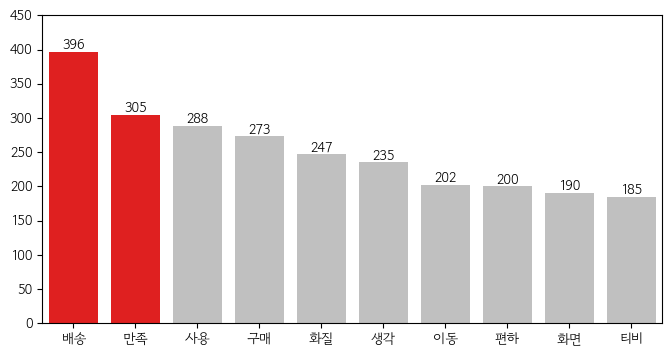

In [86]:
sns.barplot(x = top10.index, y = top10.values, palette = myPal)
plt.ylim(0, 450)
for i, v in enumerate(top10):
    plt.text(x = i, y = v, s = v, ha = 'center', va = 'bottom');